# D1 VCO Calibration

Measured this on the tektronics 3303; power measurement is crap, fluctuates by 3dB or so. Verified afterwards that this is the 3303 not the VCO.

In [1]:
import numpy as np
from matplotlib.pyplot import *

In [3]:
from fitters import linear

In [4]:
import scipy.optimize as opt

In [ ]:
linear.f()

In [11]:
linear.guess(Voltage, Frequency)

[-19.860937500000002, 121.4625]

[ -21.98656016  212.9459437 ]


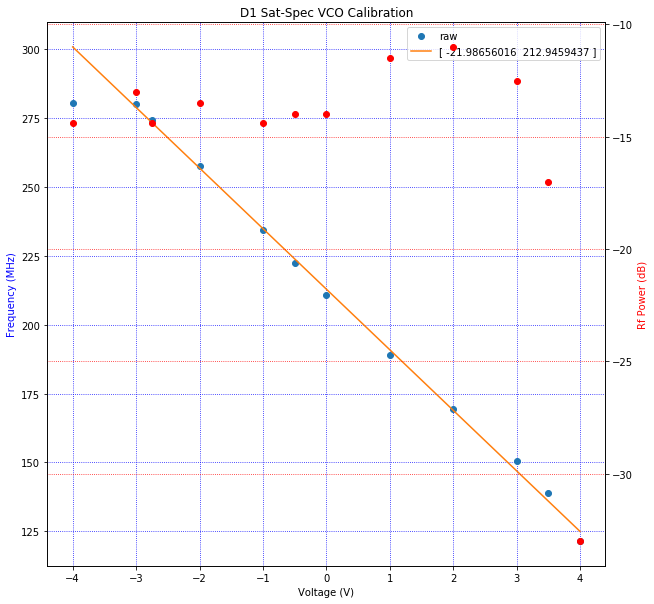

In [19]:
Voltage = [0, 1, 2, 3, -0.5, -1, -2, -3, -4, -2.75, 4, 3.5]
# with 10dB attenuator on front
Power = [-14, -11.5, -11, -12.5, -14, -14.4, -13.5, -13, -14.4, -14.4, -33, -17]
Frequency = [210.7375, 188.875, 169.575, 150.5, 222.4, 234.25, 257.725, 280, 280.35, 274.4, 121.4625, 139.0375]
Frequency_f = [210.7375, 188.875, 169.575, 150.5, 222.4, 234.25, 257.725, 280, 274.4, 121.4625, 139.0375]
Voltage_f = [0, 1, 2, 3, -0.5, -1, -2, -3, -2.75, 4, 3.5]
f, ax = subplots(figsize=(10,10))
ax.plot(Voltage, Frequency,'o',label='raw')
fitVals, fitCov = opt.curve_fit(linear.f, Voltage_f, Frequency_f, p0=linear.guess(Voltage, Frequency))
xpts = np.linspace(-4,4,1000)
y = linear.f(xpts, *fitVals);
ax.plot(xpts,y, label=fitVals)
ax.legend()
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Frequency (MHz)', color='b')
ax.grid(True, color='b', linestyle=':')
ax2 = ax.twinx()
ax2.plot(Voltage,Power,'ro')
ax2.set_ylabel('Rf Power (dB)', color='r')
ax2.grid(True, color='r', linestyle=':')
title('D1 Sat-Spec VCO Calibration');
print(fitVals)